## MLP Model for image Classification ( safe vs unsafe )


In [156]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import glob
from PIL import Image as im
from skimage.feature import hog
from skimage.transform import resize
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import f1_score

In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
vect_classes=["normal","violent"]
#On cree un vecteur qui contient nos 15 classes ou chaque classe represente une personne.
df=[]
vect_gradient=[]
gradient = []
i=0
new_path='/content/drive/MyDrive/test_images_violence'
for file_name in os.listdir(new_path): #Parcourir les fichier d'images dans notre dossier.
  for image in os.listdir(new_path+'/'+file_name): #Pour chaque image dans le fichier
    im =plt.imread(new_path+'/'+file_name+'/'+image)
    # Convert the color image to grayscale
    if len(im.shape) == 3:
      im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    image= resize(im,(128,64)) 
    
    fv, hog_image = hog(image, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2), visualize
                        =True, multichannel=False) # Calcule du vecteur de gradients
    vect_gradient.append(fv)
    gradient.append(hog_image)
  df_vect_gradient=pd.DataFrame(vect_gradient) #Chaque fichier on a cree un tableau qui contient tous les vecteur gradients puis on l'a converti en DataFrame
  vect_gradient=[]
  df_vect_gradient["classes"]=vect_classes[i] # Creation d'une colonne "classes" dont la valeur est la classe adequate pour chaque fichier
  df.append(df_vect_gradient) # ajouter cette dataframe comme element dans le tableau df
  i=i+1


<ipython-input-158-c89e10383da6>:16: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fv, hog_image = hog(image, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2), visualize
<ipython-input-158-c89e10383da6>:16: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fv, hog_image = hog(image, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2), visualize


In [159]:
df[1]

,0,1,2,3,4,5,6,7,8,9,...,3771,3772,3773,3774,3775,3776,3777,3778,3779,classes
0,0.082739,0.033578,0.005451,0.105487,0.139825,0.104255,0.039780,0.051076,0.047738,3.031399e-01,...,0.310678,0.144533,0.143220,0.050467,3.106780e-01,0.224823,0.227056,1.857489e-01,0.138053,violent
1,0.257879,0.042685,0.064709,0.096881,0.168553,0.112191,0.040712,0.062501,0.257879,2.211921e-01,...,0.298490,0.029077,0.010506,0.000000,2.372202e-01,0.035347,0.130258,2.078032e-01,0.298490,violent
2,0.224590,0.123087,0.175233,0.154263,0.396927,0.111377,0.037640,0.126489,0.031880,3.987952e-02,...,0.228590,0.129738,0.173810,0.151657,5.091437e-01,0.058084,0.000000,1.277772e-02,0.195009,violent
3,0.144054,0.000000,0.000000,0.000000,0.018744,0.000000,0.000000,0.088121,0.434116,2.819809e-01,...,0.406368,0.000000,0.000000,0.000000,8.720997e-19,0.000000,0.000000,0.000000e+00,0.406368,violent
4,0.365353,0.162877,0.082082,0.070664,0.061363,0.000316,0.000000,0.257358,0.365353,3.653528e-01,...,0.080844,0.000000,0.042331,0.053961,7.924108e-02,0.001014,0.019742,0.000000e+00,0.159299,violent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,0.400634,0.063576,0.010105,0.012620,0.070846,0.014069,0.009615,0.022901,0.187470,4.004096e-01,...,0.230931,0.045465,0.021812,0.059909,6.414654e-02,0.023543,0.025674,5.621733e-03,0.015187,violent
389,0.077640,0.013092,0.232676,0.219429,0.042753,0.000000,0.000000,0.000000,0.000000,3.006808e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,violent
390,0.064651,0.027656,0.003370,0.007974,0.043491,0.019741,0.015089,0.028485,0.054045,4.055802e-01,...,0.277311,0.112237,0.065240,0.053216,1.052593e-01,0.073309,0.086789,3.108476e-01,0.310848,violent
391,0.291392,0.000000,0.000000,0.151337,0.421681,0.000000,0.000000,0.000000,0.141264,2.050871e-16,...,0.412991,0.000000,0.000000,0.167752,4.129908e-01,0.000000,0.000000,9.369193e-08,0.000000,violent


In [160]:
dataset = pd.concat(df, ignore_index=True)
dataset


,0,1,2,3,4,5,6,7,8,9,...,3771,3772,3773,3774,3775,3776,3777,3778,3779,classes
0,0.347840,0.014655,0.012956,0.000000,0.306484,0.016052,0.033868,0.088254,0.482798,4.769800e-02,...,0.247834,0.247834,0.170993,0.083392,0.072316,0.021307,0.046250,3.577034e-03,0.178145,normal
1,0.123311,0.001580,0.115290,0.187945,0.496740,0.000000,0.000000,0.018533,0.399893,3.668946e-03,...,0.245720,0.040706,0.085393,0.082405,0.274325,0.137330,0.064133,8.585947e-02,0.155767,normal
2,0.096500,0.016930,0.015914,0.040822,0.069594,0.025778,0.012669,0.021709,0.041976,3.224545e-02,...,0.060095,0.041232,0.015667,0.141303,0.219437,0.215903,0.071584,3.310826e-02,0.121137,normal
3,0.246828,0.196327,0.110723,0.138285,0.137358,0.048470,0.138236,0.018109,0.098090,2.468284e-01,...,0.163854,0.160661,0.045589,0.028930,0.242634,0.242634,0.242634,1.848803e-01,0.121260,normal
4,0.366806,0.092625,0.053169,0.000000,0.016469,0.018094,0.000000,0.021961,0.366806,3.668059e-01,...,0.288507,0.074156,0.031811,0.045562,0.268060,0.133397,0.123722,1.588904e-01,0.130665,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.400634,0.063576,0.010105,0.012620,0.070846,0.014069,0.009615,0.022901,0.187470,4.004096e-01,...,0.230931,0.045465,0.021812,0.059909,0.064147,0.023543,0.025674,5.621733e-03,0.015187,violent
986,0.077640,0.013092,0.232676,0.219429,0.042753,0.000000,0.000000,0.000000,0.000000,3.006808e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,violent
987,0.064651,0.027656,0.003370,0.007974,0.043491,0.019741,0.015089,0.028485,0.054045,4.055802e-01,...,0.277311,0.112237,0.065240,0.053216,0.105259,0.073309,0.086789,3.108476e-01,0.310848,violent
988,0.291392,0.000000,0.000000,0.151337,0.421681,0.000000,0.000000,0.000000,0.141264,2.050871e-16,...,0.412991,0.000000,0.000000,0.167752,0.412991,0.000000,0.000000,9.369193e-08,0.000000,violent


(array([597.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 393.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <BarContainer object of 15 artists>)

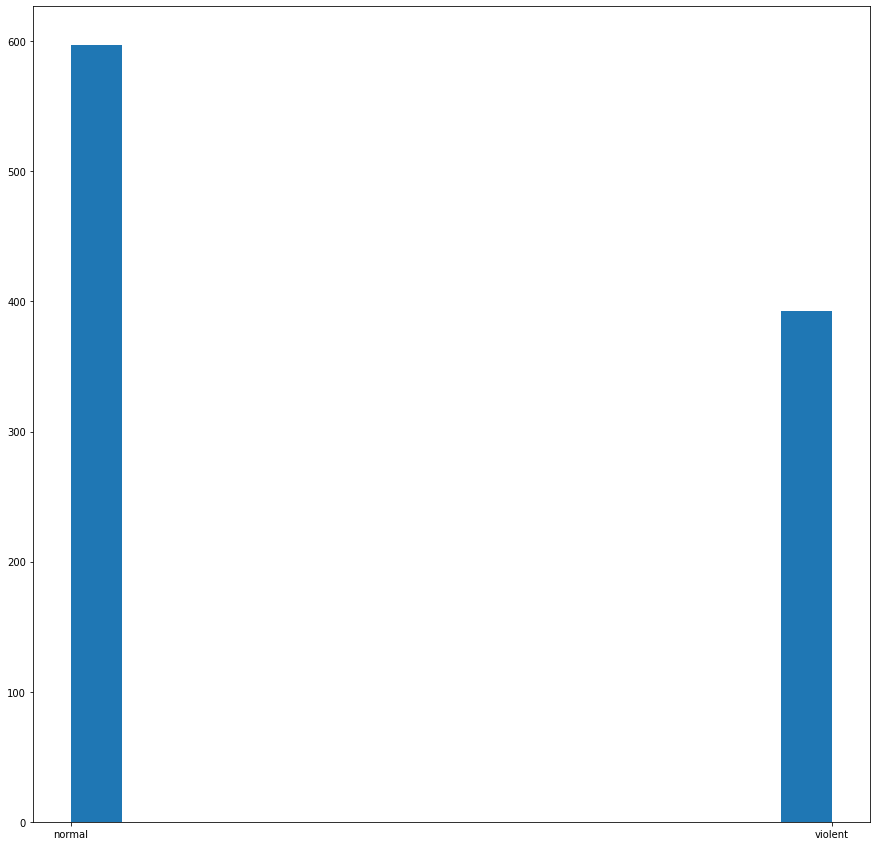

In [161]:
plt.figure(figsize=(15,15))
plt.hist(dataset['classes'],bins=15)

<ipython-input-162-570d5fd8a4d4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datafram=datafram.append(dataset.iloc[[i]])
<ipython-input-162-570d5fd8a4d4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datafram=datafram.append(dataset.iloc[[i]])
<ipython-input-162-570d5fd8a4d4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datafram=datafram.append(dataset.iloc[[i]])
<ipython-input-162-570d5fd8a4d4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datafram=datafram.append(dataset.iloc[[i]])
<ipython-input-162-570d5fd8a4d4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

(array([477.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 314.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <BarContainer object of 15 artists>)

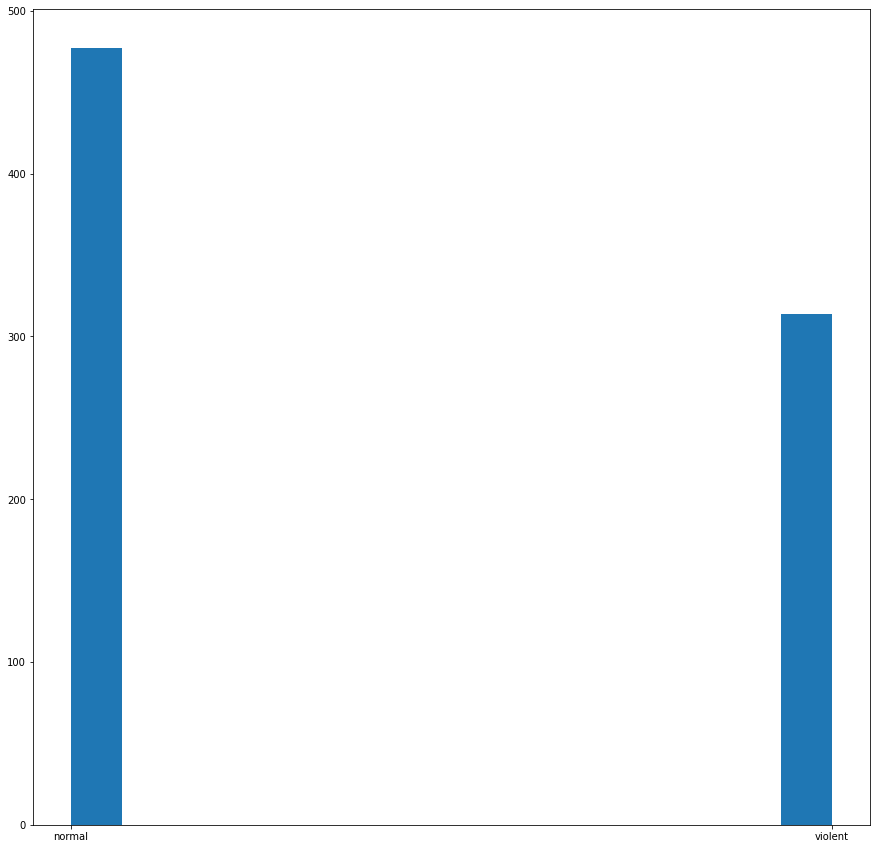

In [162]:
i=0
X_train=pd.DataFrame()
Y_train=pd.DataFrame()
X_test=pd.DataFrame()
Y_test=pd.DataFrame()
for classe1 in vect_classes:
  datafram=pd.DataFrame()
  for classes in dataset['classes']:
    if classe1==classes:
      datafram=datafram.append(dataset.iloc[[i]])
      i=i+1
  x=datafram.drop(['classes'],axis=1)
  y=datafram['classes']
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  
  X_train=pd.concat([X_train,x_train])
  Y_train=pd.concat([Y_train,y_train])
  X_test= pd.concat([X_test,x_test])
  Y_test= pd.concat([Y_test,y_test])


   
plt.figure(figsize=(15,15))
plt.hist(Y_train[0],bins=15)
  
  



# 3. Classification:

# **MLP**

In [163]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(130,50,30),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(130, 50, 30), max_iter=300)

## 2.Predictions :

In [164]:
y_pred = mlp_clf.predict(X_test)

print('==>  Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))

==>  Accuracy: 0.65


##LSTM Model to classify appropriate and unappropriate text

In [165]:
import pandas as pd 

data=pd.read_csv("/content/drive/MyDrive/data_nlp/labeled_data.csv")
data.head()
data1= data.drop(['count', 'hate_speech', 'Unnamed: 0','offensive_language','neither'], axis=1)
data1

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


data1 contain the finel dataset that we ganna use

teweet: contain three categories: hate speech, offensive but not hate speech, or neither offensive nor hate speech. classe: the classification of each text (the targuet)

In [166]:
data1.isnull().sum()

class    0
tweet    0
dtype: int64

In [167]:
#convert to lower case 
data1['tweet'] = data1['tweet'].apply(lambda x:x.lower())
#remove ponctuation
import string
from string import digits
data1['tweet']= data1['tweet'].apply(lambda x:x.translate(str.maketrans('', '', string.punctuation))) 
#Remove '\n' and '\t', extra spaces, quoting text, and progressive pronouns
data1['tweet'] = data1['tweet'].apply(lambda x: x.replace('\n', ' '))
data1['tweet'] = data1['tweet'].apply(lambda x: x.replace('\t', ' '))
data1['tweet'] = data1['tweet'].str.replace("    ", " ")
data1['tweet'] = data1['tweet'].str.replace('"', '')
data1['tweet'] = data1['tweet'].str.replace("'s", "")
# Removing numbers
data1['tweet']= data1['tweet'].apply(lambda x:x.translate(str.maketrans('', '', digits))) 

In [168]:
data1['tweet']

0         rt mayasolovely as a woman you shouldnt compl...
1         rt mleew boy dats coldtyga dwn bad for cuffin...
2         rt urkindofbrand dawg rt sbabylife you ever f...
3           rt cganderson vivabased she look like a tranny
4         rt shenikaroberts the shit you hear about me ...
                               ...                        
24778    yous a muthafin lie lifeasking pearls coreyema...
24779    youve gone and broke the wrong heart baby and ...
24780    young buck wanna eat dat nigguh like i aint fu...
24781                youu got wild bitches tellin you lies
24782    ruffled  ntac eileen dahlia  beautiful color c...
Name: tweet, Length: 24783, dtype: object

In [169]:
# import all the resources for Natural Language Processing with 
import nltk
nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

True

In [170]:
# Removing Stop Words using stopwords.words in NLTK library
from nltk.corpus import stopwords
nltk.download('punkt')
stop_words = list(stopwords.words('english'))
for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    data1['tweet'] = data1['tweet'].str.replace(regex_stopword, '')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-170-a4790f0d71cb>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data1['tweet'] = data1['tweet'].str.replace(regex_stopword, '')


In [171]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [172]:
#converting the text data into a numerical feature array 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10)

X = cv.fit_transform(data1['tweet']).toarray()
y = data1['class']

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

##Converting the data into categorical data:

In [174]:
from keras.utils.np_utils import to_categorical
import numpy as np 
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from joblib import dump, load

In [175]:
y_train=to_categorical(y_train, num_classes = 3, dtype='float32')
y_test=to_categorical(y_test, num_classes = 3, dtype='float32')

In [176]:
model = Sequential()
model.add(Embedding(232337, 10, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(X_train, y_train,validation_data
                    = (X_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
272/272 [==============================] - 15s 39ms/step - loss: 0.4356 - accuracy: 0.7665 - val_loss: 0.3229 - val_accuracy: 0.7743
Epoch 2/10
272/272 [==============================] - 11s 41ms/step - loss: 0.3040 - accuracy: 0.7797 - val_loss: 0.2949 - val_accuracy: 0.7923
Epoch 3/10
272/272 [==============================] - 12s 43ms/step - loss: 0.2934 - accuracy: 0.7927 - val_loss: 0.2928 - val_accuracy: 0.7922
Epoch 4/10
272/272 [==============================] - 12s 43ms/step - loss: 0.2920 - accuracy: 0.7976 - val_loss: 0.2936 - val_accuracy: 0.7919
Epoch 5/10
272/272 [==============================] - 12s 43ms/step - loss: 0.2895 - accuracy: 0.8022 - val_loss: 0.2895 - val_accuracy: 0.8090
Epoch 6/10
272/272 [==============================] - 10s 36ms/step - loss: 0.2873 - accuracy: 0.8071 - val_loss: 0.2883 - val_accuracy: 0.8091
Epoch 7/10
272/272 [==============================] - 12s 42ms/step - loss: 0.2850 - accuracy: 0.8071 - val_loss: 0.2850 - val_accuracy:

##Testing the models

In [177]:
import re

In [178]:
import PIL
from io import BytesIO

def classify_input(input_data):   #classify the input weither image or text as safe or not safe
    if isinstance(input_data, str):
        # Input is text
        # convert all uppercase letters to lowercase
        text = input_data.lower()
        # Removing punctuations
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Removing numbers
        text = text.translate(str.maketrans('', '', digits))
        #Remove '\n' and '\t', extra spaces, quoting text, and progressive pronouns
        text = text.replace('\n', ' ')
        text = text.replace('\t', ' ')
        text = text.replace("    ", " ")
        text = text.replace('"', '')
        text = text.replace("'s", "")
        #remove stop words
        for stop_word in stop_words:
           regex_stopword = r"\b" + stop_word + r"\b"
        text = text.replace(regex_stopword, '')
        #spliting the text into sentence 
        sentence_list=re.split('[.!?]',text)
        #vectorizer de the text
        cv = CountVectorizer(max_features = 10)

        x_text = cv.fit_transform(sentence_list).toarray()
        y_predict=model.predict(x_text)
        max=np.max(y_predict)
        if (max==y_predict[0][0]):
           print("this might be an unappropriate comment for your child  ")
        elif max==y_predict[0][1] :
           print("there might be an offensive comment for your child")
        else :
         print("this speech is neither hateful nor offensive ")
        pass
    elif isinstance(input_data, PIL.JpegImagePlugin.JpegImageFile):
        # Input is image
        if len(input_data.size) == 3:
          input_data = cv.cvtColor(input_data, cv.COLOR_BGR2GRAY)
        input_data= resize(np.array(input_data),(128,64)) 
        fv, hog_image = hog(input_data, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2), visualize =True, multichannel=True)
        prediction = mlp_clf.predict(fv.reshape(1, -1))[0]
        if prediction == 'violent':
         print('This content is unsafe.')
        else:
         print('This content is safe.')
      
    else:
        raise ValueError("Input data must be either text or an image")

##Image classifiying example

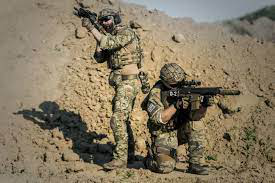

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [179]:
#let's try to predict if this image is safe or not 
from PIL import Image
# Open the image file
img = Image.open('/content/téléchargement (5).jpeg')
# Show the image
img.show()

In [182]:
# see if the image is unsafe
classify_input(img)

This content is unsafe.


<ipython-input-178-b2830984082d>:43: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fv, hog_image = hog(input_data, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2), visualize =True, multichannel=True)


##Text Classifiying example

In [181]:
text="let me tell you that you are so ugly! all peaple do not like you at all and you are fat."
classify_input(text)

1/1 [==============================] - 0s 277ms/step
there might be an offensive comment for your child
